In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [2]:
test_data = pd.read_csv('test.csv')

In [3]:
test_data.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000
mean,102.011086,12643.576541,-509.077755,-6479.740939,8.525942,8.534996,-70.324669,-72.694420,65.895769,-3.336822,-68.613773,-36.236767,-32.681697,-4303.156711
std,1.643594,2516.270914,2368.360461,4829.300710,0.310837,0.189920,849.853859,849.651005,56.261780,188.312731,850.001489,867.608657,879.483078,4976.927245
min,100.000000,10177.500000,-9999.000000,-9999.000000,8.500000,8.250000,-9999.000000,-9999.000000,3.985964,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,100.000000,10869.500000,72.247600,-9999.000000,8.500000,8.358610,2.269458,0.003207,30.106430,0.163874,3.064271,1.719360,1.685470,-9999.000000
50%,101.000000,11343.000000,81.822500,-9999.000000,8.500000,8.512500,2.443988,0.019000,53.767100,0.202947,3.892648,2.839570,2.732343,19.016170
75%,104.000000,16034.250000,88.451850,139.140850,8.500000,8.651935,2.538193,0.041436,94.247650,0.241950,5.017876,8.112067,7.816489,28.633825
max,104.000000,17443.500000,125.394000,190.263000,12.250000,9.314860,3.201297,0.192256,1711.420000,0.732381,15.135460,5000.000000,5000.000000,300.110700


In [4]:
#Convert logarithm values of resistivity logs back to normal value
#test_data["RDEP"]=10**(test_data["RDEP"])
#test_data["RMED"]=10**(test_data["RMED"])
#test_data.describe()

In [5]:
test_data['WELLNUM'].unique()

array([100, 101, 103, 104], dtype=int64)

In [6]:
grouped = test_data.groupby('WELLNUM')

In [7]:
grouped.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
0,100,15912.5,65.46309,-9999.000,8.50,8.275658,2.545791,0.051429,9.791040,0.134139,5.858729,2.881351,2.645010,262.28170
1,100,15913.0,64.56976,-9999.000,8.50,8.275658,2.524871,0.043547,11.278870,0.111488,6.021325,2.881351,2.645010,262.03700
2,100,15913.5,64.43656,-9999.000,8.50,8.275658,2.507431,0.037683,9.954506,0.112143,6.060280,3.027379,2.928987,261.98810
3,100,15914.0,65.03485,-9999.000,8.50,8.275658,2.575224,0.064832,8.630137,0.114846,6.202412,3.054653,2.974949,261.71960
4,100,15914.5,65.13235,-9999.000,8.50,8.286819,2.550074,0.017329,7.305769,0.116967,5.179704,3.054653,2.974949,261.52470
3063,101,10177.5,77.76540,-9999.000,12.25,8.705420,-9999.000000,-9999.000000,46.240000,0.313380,-9999.000000,-9999.000000,-9999.000000,-9999.00000
3064,101,10178.0,82.27970,-9999.000,12.25,8.702320,-9999.000000,-9999.000000,46.820300,0.317550,-9999.000000,-9999.000000,-9999.000000,-9999.00000
3065,101,10178.5,85.82940,-9999.000,12.25,8.708240,-9999.000000,-9999.000000,48.416500,0.329425,-9999.000000,-9999.000000,-9999.000000,-9999.00000
3066,101,10179.0,90.22740,-9999.000,12.25,8.698880,-9999.000000,-9999.000000,54.832800,0.335807,-9999.000000,-9999.000000,-9999.000000,-9999.00000
3067,101,10179.5,89.90930,-9999.000,12.25,8.701620,-9999.000000,-9999.000000,63.864200,0.345120,-9999.000000,-9999.000000,-9999.000000,-9999.00000


In [8]:
# Create empty lists
test_datas_wells = []
wellnames = []

#Split up the data by well
for well, data in grouped:
    test_datas_wells.append(data)
    wellnames.append(well)

In [9]:
for i, well in enumerate(wellnames):
    print(f'Index: {i} - {well}')

Index: 0 - 100
Index: 1 - 101
Index: 2 - 103
Index: 3 - 104


In [10]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
    
    plt.tight_layout()
    plt.show()

In [11]:
curves_to_plot = ['DTC', 'DTS', 'GR', 'NEU', 'RDEP', 'RMED', 'DEN', 'PEF']
logarithmic_curves = ['RDEP', 'RMED']

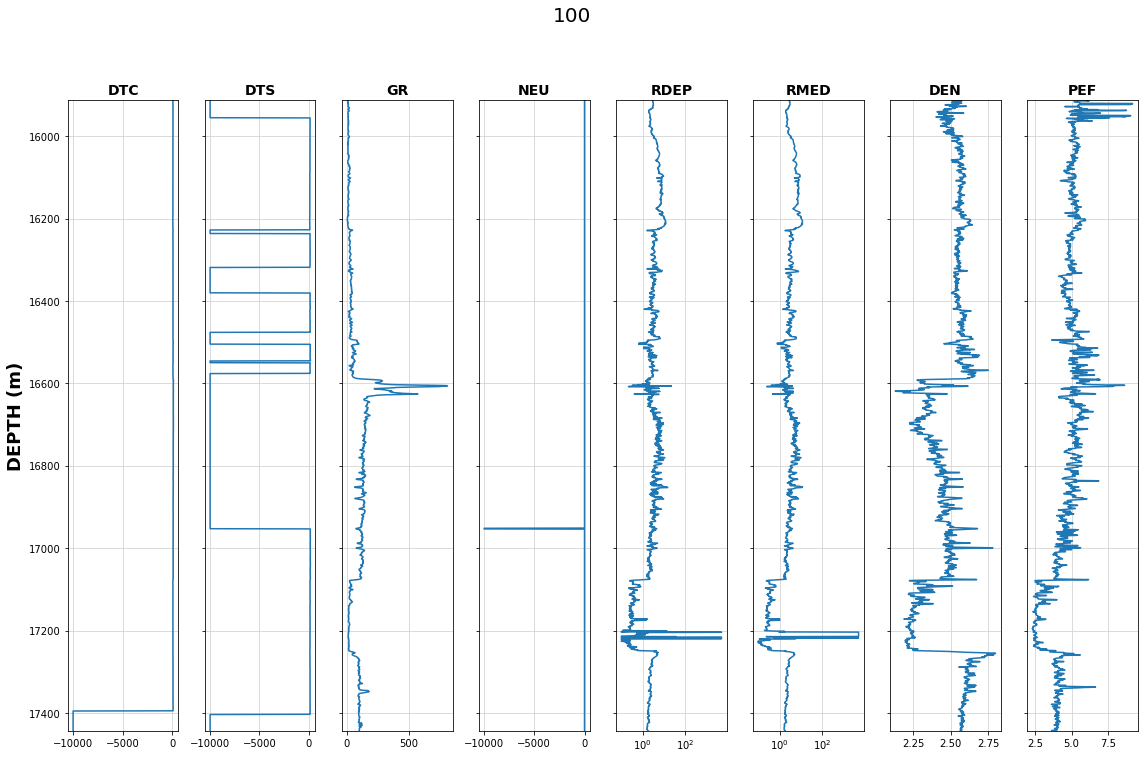

In [12]:
well = 0
create_plot(wellnames[well], test_datas_wells[well], curves_to_plot, test_datas_wells[well]['DEPTH'], logarithmic_curves)

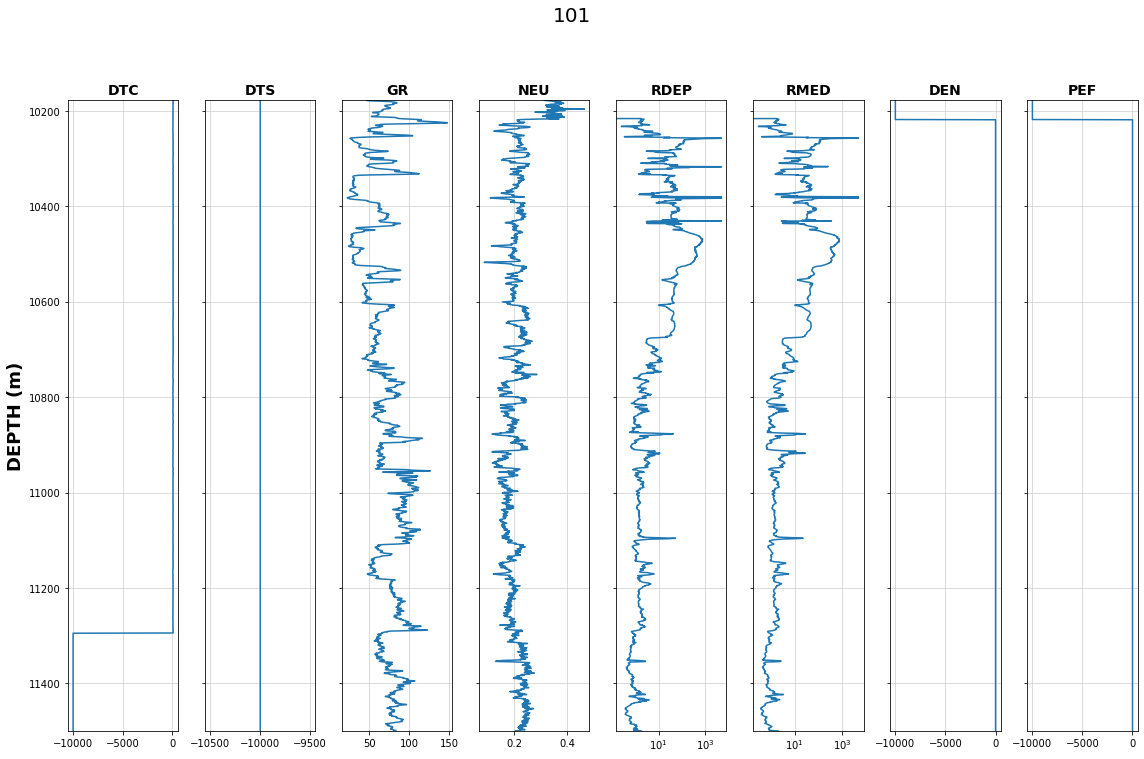

In [13]:
well = 1
create_plot(wellnames[well], test_datas_wells[well], curves_to_plot, test_datas_wells[well]['DEPTH'], logarithmic_curves)

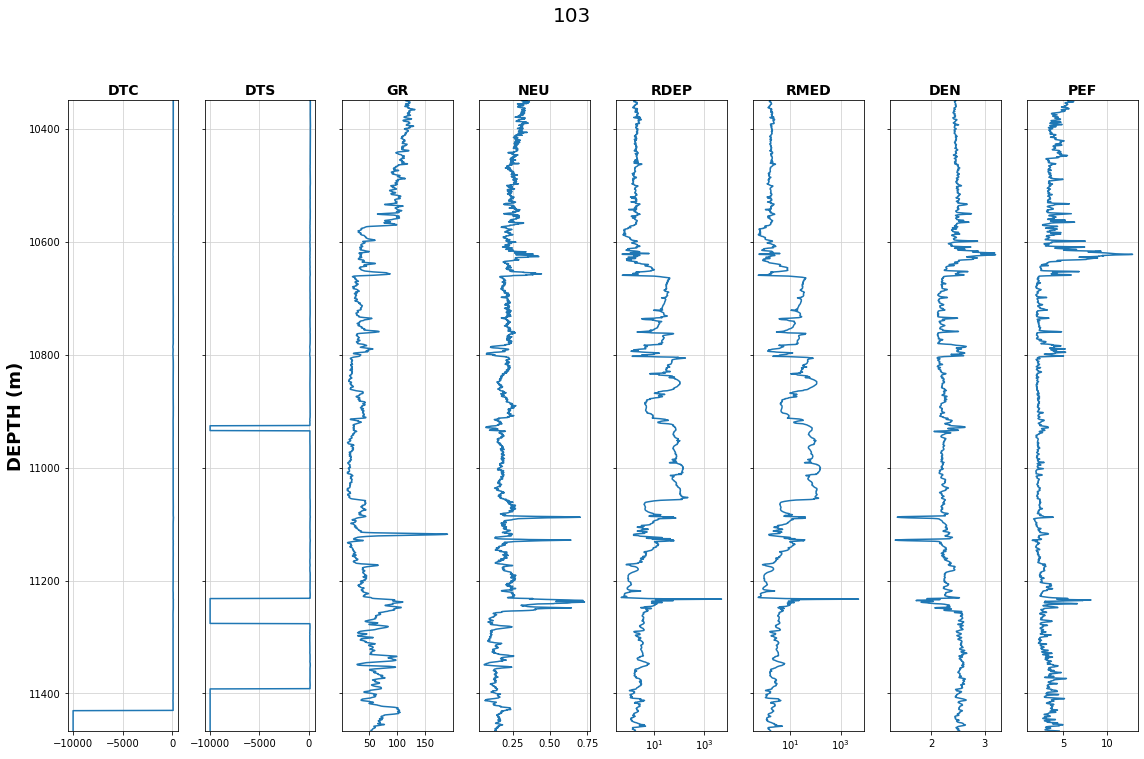

In [14]:
well = 2
create_plot(wellnames[well], test_datas_wells[well], curves_to_plot, test_datas_wells[well]['DEPTH'], logarithmic_curves)

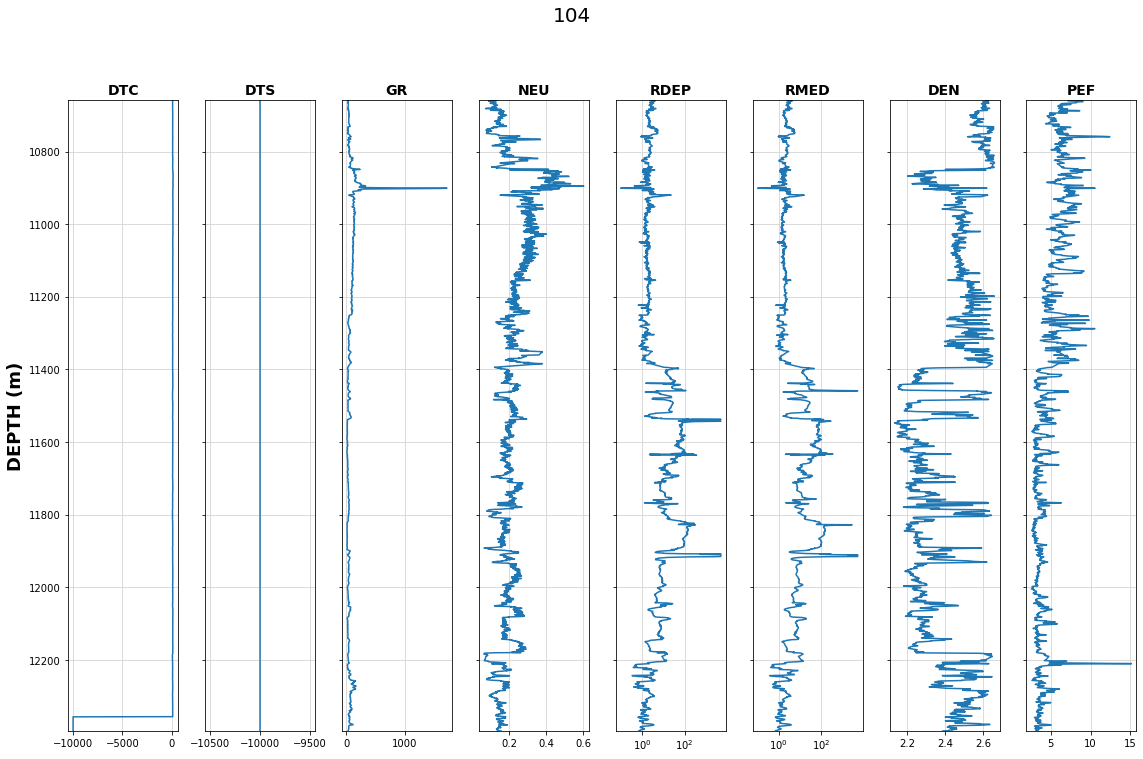

In [15]:
well = 3
create_plot(wellnames[well], test_datas_wells[well], curves_to_plot, test_datas_wells[well]['DEPTH'], logarithmic_curves)

In [16]:
def make_boxplot(welldata, inputs):

    num_inputs = len(inputs)

    fig, axs = plt.subplots(1, num_inputs, figsize=(20,10))

    for i, (ax, curve) in enumerate(zip(axs.flat, inputs), 1):
        sns.boxplot(y=welldata[curve], ax=ax, color='cornflowerblue', showmeans=True,  
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"},
               flierprops={'marker':'o', 
                          'markerfacecolor':'darkgreen',
                          'markeredgecolor':'darkgreen'})
        
        ax.set_title(inputs[i-1])
        ax.set_ylabel('')

    plt.subplots_adjust(hspace=0.15, wspace=1.25)
    plt.show()

In [17]:
well_0=test_data.loc[test_data.WELLNUM==0]
well_0.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']
Total Number of Samples: 11275


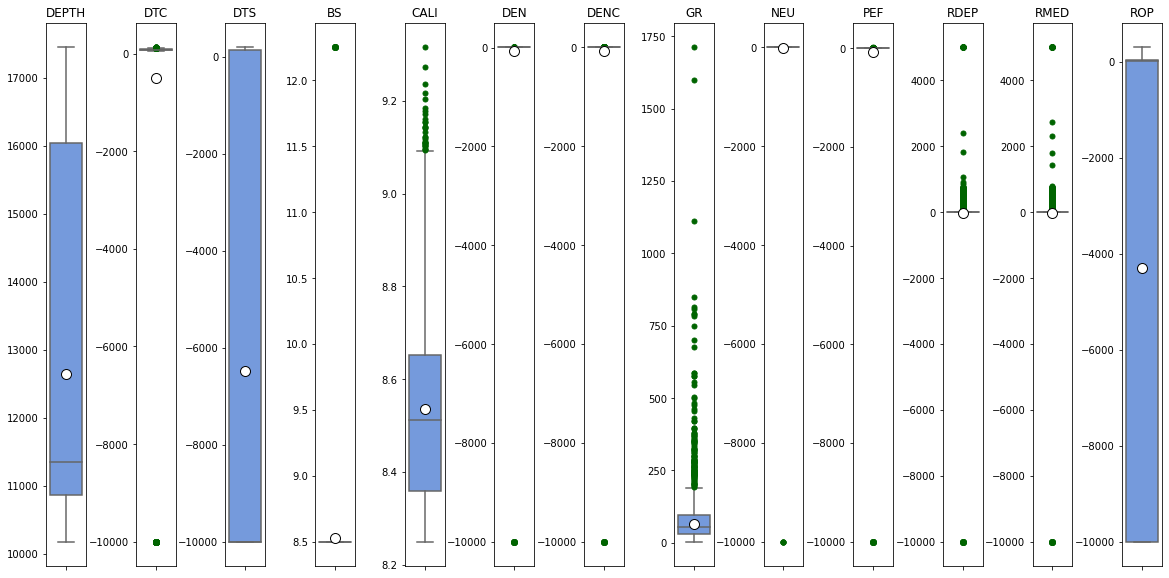

In [18]:
inputs = list(test_data.columns)
inputs.pop(0) # remove the well name from the columns list
print(inputs)
print(f'Total Number of Samples: {len(test_data)}')
make_boxplot(test_data, inputs)

In [19]:
import matplotlib
def make_xplot(welldata, xvar, yvar,  color, rows=1, cols=1, xscale=[0,1], yscale=[0,1], vmin=0, vmax=100):
    fig, axs = plt.subplots(rows, cols, figsize=(25,5))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
    
    for (WELLNUM, welldata), ax in zip(grouped, axs.flat):
        sc = ax.scatter(x=xvar, y=yvar, data=welldata, s=5, c=color, vmin=vmin, vmax=vmax, cmap=cmap)
#         sns.scatterplot(x=xvar, y=yvar, data=welldata, hue=color, ax=ax, legend=False, palette="viridis")

        ax.set_ylim(yscale[0], yscale[1])
        ax.set_xlim(xscale[0], xscale[1])
        ax.set_ylabel(yvar)
        ax.set_xlabel(xvar)
        ax.set_title(WELLNUM)
        
        fig.colorbar(sc, ax=ax)
    plt.tight_layout()
    plt.show()

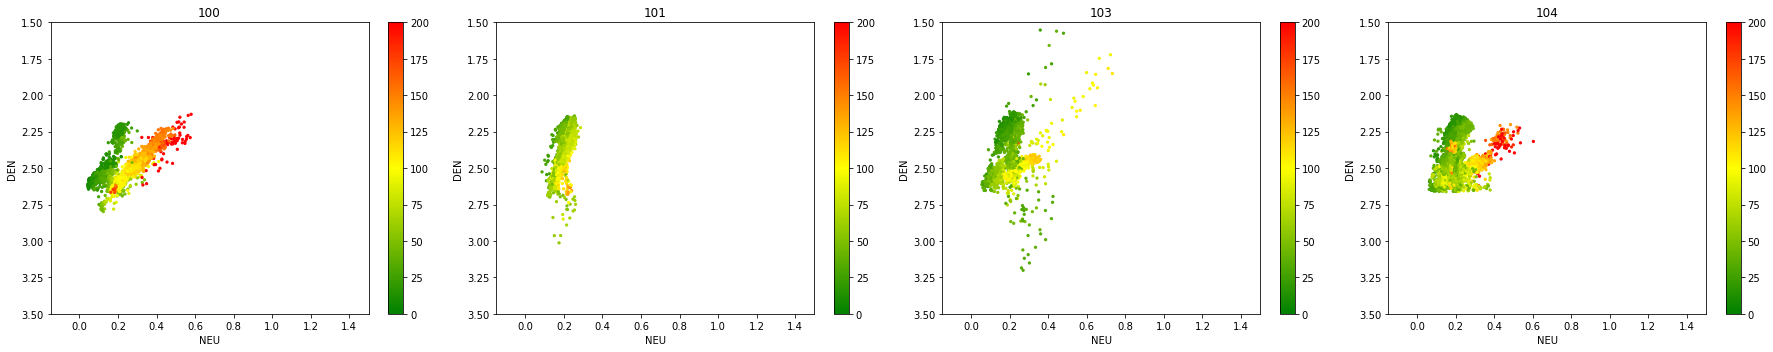

In [20]:
grouped = test_data.groupby('WELLNUM')
make_xplot(grouped, 'NEU', 'DEN', 'GR', 1, 4, [-0.15, 1.5], [3.5,1.5], 0, 200)

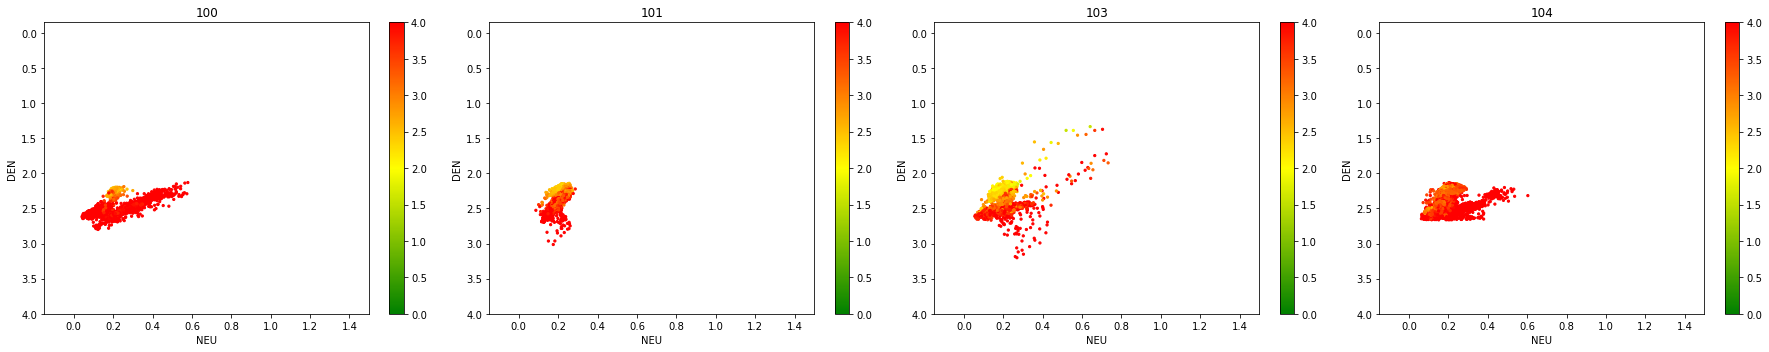

In [21]:
grouped = test_data.groupby('WELLNUM')
make_xplot(grouped, 'NEU', 'DEN', 'PEF', 1, 4, [-0.15, 1.5], [4,-0.15], 0, 4)

In [22]:
#Data preparation for with Automated Methods
outliers_detection=test_data[['WELLNUM', 'DEPTH', 'GR', 'NEU', 'DEN','PEF', 'RMED', 'RDEP']]
outliers_detection.describe()

,WELLNUM,DEPTH,GR,NEU,DEN,PEF,RMED,RDEP
count,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000
mean,102.011086,12643.576541,65.895769,-3.336822,-70.324669,-68.613773,-32.681697,-36.236767
std,1.643594,2516.270914,56.261780,188.312731,849.853859,850.001489,879.483078,867.608657
min,100.000000,10177.500000,3.985964,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,100.000000,10869.500000,30.106430,0.163874,2.269458,3.064271,1.685470,1.719360
50%,101.000000,11343.000000,53.767100,0.202947,2.443988,3.892648,2.732343,2.839570
75%,104.000000,16034.250000,94.247650,0.241950,2.538193,5.017876,7.816489,8.112067
max,104.000000,17443.500000,1711.420000,0.732381,3.201297,15.135460,5000.000000,5000.000000


In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Create a copy of the dataframe so that the original remanins untouched and extract the required curves
#anomaly_df = train_data[['WELLNUM', 'DEPTH', 'GR', 'NEU', 'DEN', 'RMED', 'RDEP', 'DTC', 'PEF', 'DTS', 'PHIF', 'SW', 'VSH']].copy()
anomaly_df=outliers_detection

# Drop any null values. This method drops the entire row of data if one of the cells in that row
# contains a null (NaN) value
anomaly_df.dropna(inplace=True)

# Define the inputs for the anomaly detection
anomaly_inputs = ['NEU', 'DEN', 'GR', 'RDEP', 'RMED','PEF']

# Setup the models, each will have a contamination (outlier) fraction of 0.1
# The random_state is set to allow repeatable results for the Isolation Forest. 
#This can be omitted if required.
model_IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), max_features=1.0, random_state=42)
model_SVM = OneClassSVM(nu=0.10)
model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

models = {'IF':model_IF, 
        'SVM': model_SVM,
        'LOF': model_lof}

for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly'] = model.predict(anomaly_df[anomaly_inputs])

print('Model Fitting Complete')
#anomaly_df.head(5)
anomaly_df.to_csv("outliers_test_detection.csv")

C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Fitting: IF


C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\djnav\AppData\Local\Temp/ipykernel_5680/1267058419.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\djnav\AppData\Local\Temp/ipykernel_5680/1267058419.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Fitting: SVM


C:\Users\djnav\AppData\Local\Temp/ipykernel_5680/1267058419.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
C:\Users\djnav\AppData\Local\Temp/ipykernel_5680/1267058419.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df[f'{name}_anomaly'] = model.predict(anomaly_df[anomaly_inputs])


Fitting: LOF


C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\djnav\AppData\Local\Temp/ipykernel_5680/1267058419.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Model Fitting Complete


In [24]:
anomaly_df.shape

(11275, 14)

In [25]:
anomaly_df.head(5)

,WELLNUM,DEPTH,GR,NEU,DEN,PEF,RMED,RDEP,IF_anomaly_scores,IF_anomaly,SVM_anomaly_scores,SVM_anomaly,LOF_anomaly_scores,LOF_anomaly
0,100,15912.5,9.791040,0.134139,2.545791,5.858729,2.645010,2.881351,0.057170,1,-0.360708,-1,0.098807,1
1,100,15913.0,11.278870,0.111488,2.524871,6.021325,2.645010,2.881351,0.042843,1,-0.290597,-1,0.120390,1
2,100,15913.5,9.954506,0.112143,2.507431,6.060280,2.928987,3.027379,0.039734,1,-0.334989,-1,0.043836,1
3,100,15914.0,8.630137,0.114846,2.575224,6.202412,2.974949,3.054653,0.034968,1,-0.395635,-1,-0.199639,-1
4,100,15914.5,7.305769,0.116967,2.550074,5.179704,2.974949,3.054653,0.055160,1,-0.459477,-1,-0.416416,-1


Outlier Method: IF
Number of anomalous values 1128
Number of non anomalous values  10147
Total Number of Values: 11275
Outlier Method: SVM
Number of anomalous values 1128
Number of non anomalous values  10147
Total Number of Values: 11275
Outlier Method: LOF
Number of anomalous values 1008
Number of non anomalous values  10267
Total Number of Values: 11275


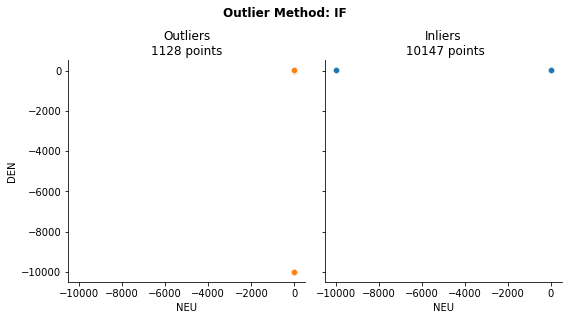

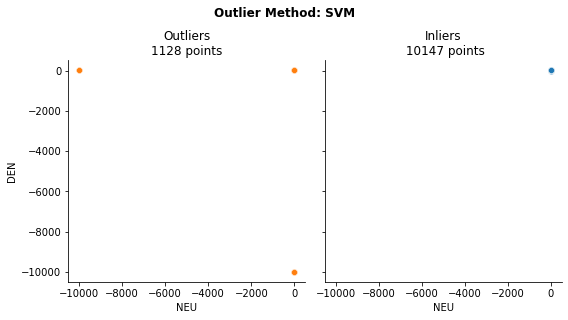

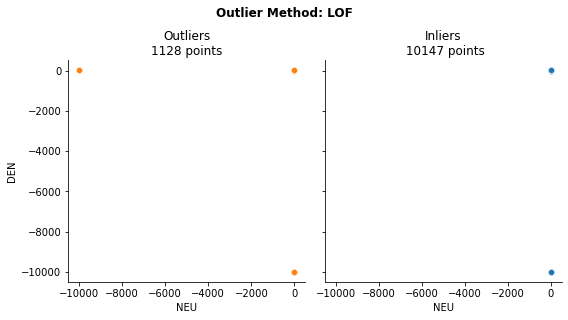

In [26]:
#We can now check the performance of each of the models using density-neturon crossplots. 
#This is achieved using Seaborn's FacetGrid and mapping a scatter plot to it.
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df, col=method, height=4, hue=method, hue_order=[1,-1])
    g.map(sns.scatterplot, 'NEU', 'DEN')
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(anomaly_df[anomaly_df['IF_anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(anomaly_df[anomaly_df['IF_anomaly']==  1])} points")

plt.show()

In [27]:
#We can now check the performance of each of the models using density-neturon crossplots. 
#This is achieved using Seaborn's FacetGrid and mapping a scatter plot to it.
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    Outliers=len(anomaly_df[anomaly_df[method]==-1])
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    Inliers=len(anomaly_df[anomaly_df[method]== 1])
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    Total_values=len(anomaly_df)
    print(f'Total Number of Values: {len(anomaly_df)}')
    Percentage_outliers=np.around((Outliers/Total_values)*100, decimals=3, out=None)
    print(f"Percentage of Outliers: {Percentage_outliers} %")

Outlier Method: IF
Number of anomalous values 1128
Number of non anomalous values  10147
Total Number of Values: 11275
Percentage of Outliers: 10.004 %
Outlier Method: SVM
Number of anomalous values 1128
Number of non anomalous values  10147
Total Number of Values: 11275
Percentage of Outliers: 10.004 %
Outlier Method: LOF
Number of anomalous values 1008
Number of non anomalous values  10267
Total Number of Values: 11275
Percentage of Outliers: 8.94 %


Outlier Method: IF
Number of anomalous values 1128
Number of non anomalous values  10147
Total Number of Values: 11275
Outlier Method: SVM
Number of anomalous values 1128
Number of non anomalous values  10147
Total Number of Values: 11275
Outlier Method: LOF
Number of anomalous values 1008
Number of non anomalous values  10267
Total Number of Values: 11275


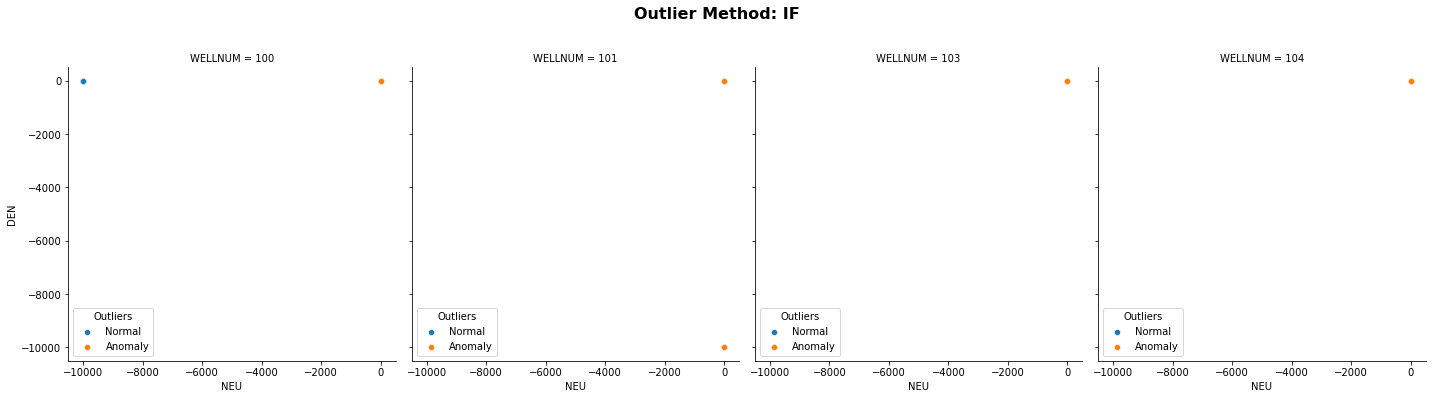

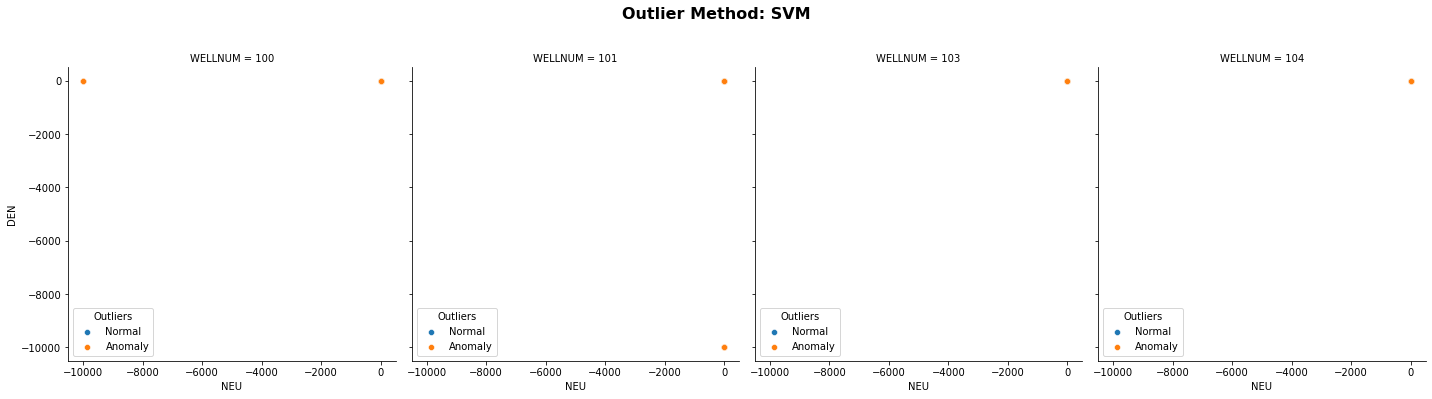

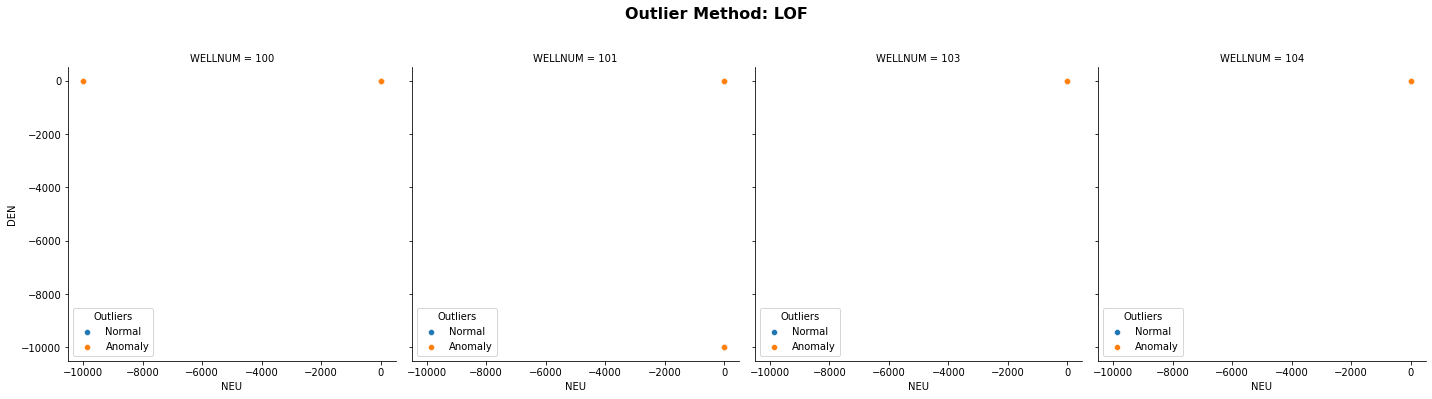

In [28]:
#We can look at the data in more detail for each of the well for each method.
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df, col='WELLNUM', hue=method, height=5, hue_order=[1,-1])
    g.map(sns.scatterplot, 'NEU', 'DEN')
    
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold', fontsize=16)

    axes = g.axes.flatten()
    for ax in axes:
        ax.legend(title='Outliers', loc='lower left', labels=['Normal', 'Anomaly'])

plt.show()
#plt.savefig('Outliers_Crossplot.png')

In [29]:
#Log Plots
#To validate where the outliers have been detected, 
#we can generate simple log plots for each method and for each well.

def create_outlier_plot(wellname, dataframe, curves_to_plot, depth_curve, outlier_method, log_curves=[]):
    num_tracks = len(curves_to_plot)
    
    outlier_shading = dataframe[outlier_method]
    
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    fig.suptitle(f'{wellname}   -   {outlier_method}', fontsize=20, y=1.05)
    
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        ax[i].fill_betweenx(depth_curve, dataframe[curve].min(), dataframe[curve].max(), where=outlier_shading>= 1, color='green', alpha=0.2)
        ax[i].fill_betweenx(depth_curve, dataframe[curve].min(), dataframe[curve].max(), where=outlier_shading<= -1, color='red', alpha=0.2)
        
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        
        
    
    plt.tight_layout()
    plt.show()

In [30]:
#Before plotting the data we can make things easier by splitting up 
#the dataframe into multiple dataframe based on the well name

#Creating empty lists to story the dataframes and wellnames in
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in anomaly_df.groupby('WELLNUM'):
    dfs_wells.append(data)
    wellnames.append(well)
    
# Selecting the curves that we want to plot
curves_to_plot = ['NEU', 'DEN', 'GR', 'RDEP', 'PEF']

In [31]:
#Once the dataframe has been split up by well, we can use the index number of the list to access the required data.
#If we loop through the wellnames list we can get the index number and the associated wellname.
#This method using the index of the same list rather than the enumerate method seen in Notebook 1.1.

print('Wellname \t Index')

for well in wellnames:
    print(f'{well} \t{wellnames.index(well)}')

Wellname 	 Index
100 	0
101 	1
103 	2
104 	3


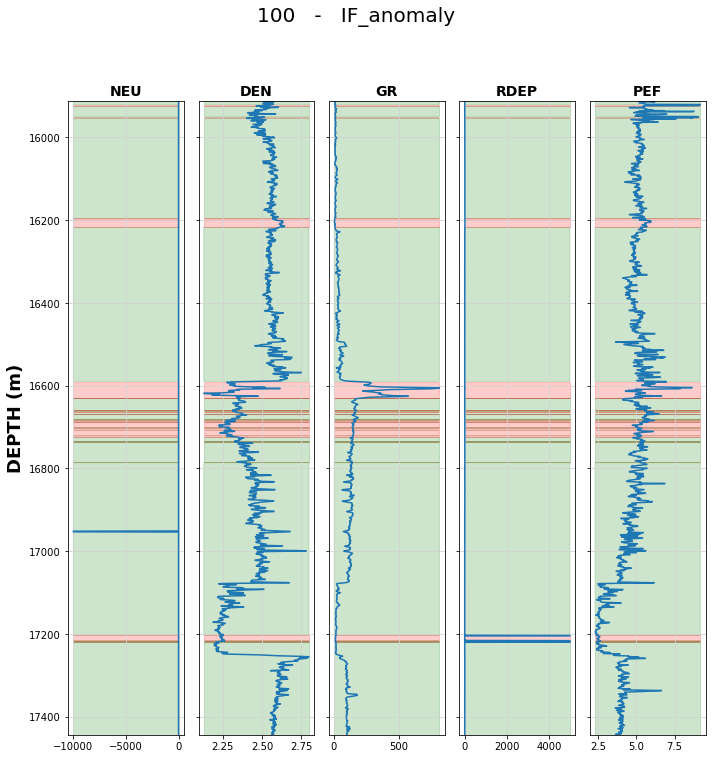

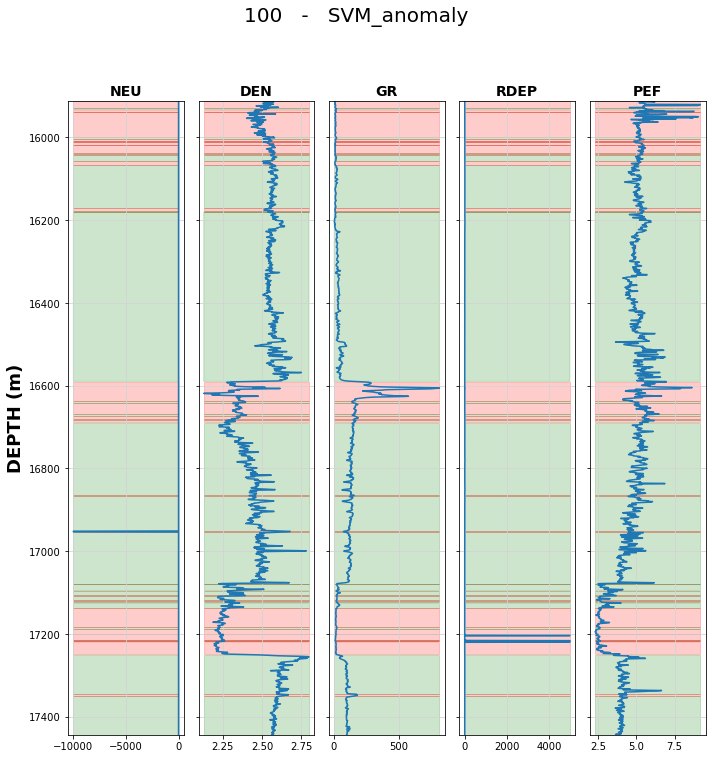

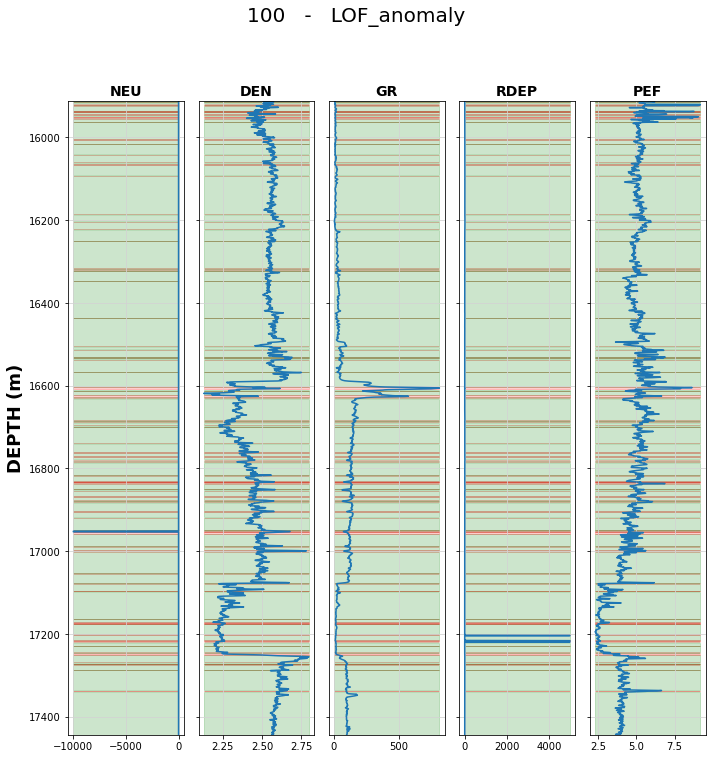

In [32]:
# Select the well by index
well = 0

# Call the function for each method:
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'IF_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'SVM_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'LOF_anomaly')

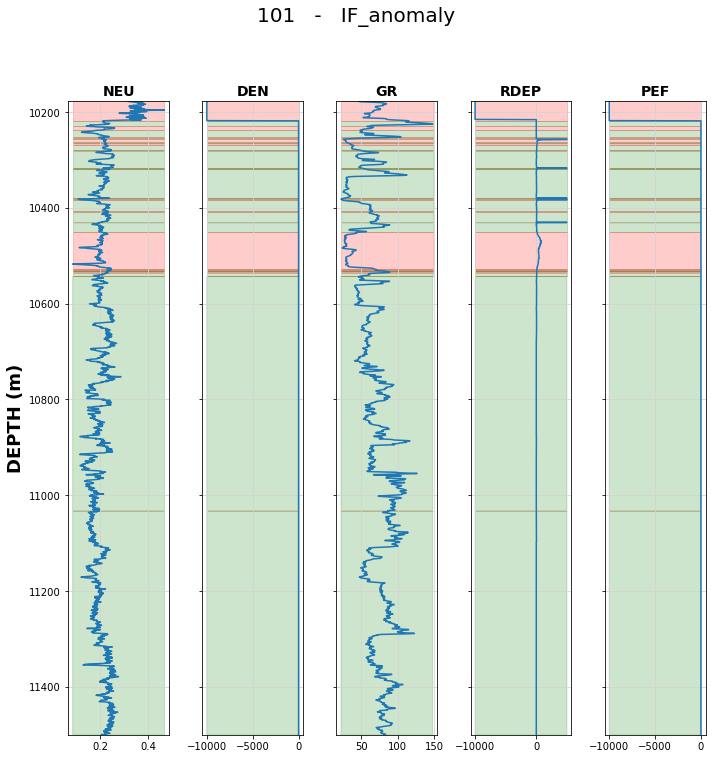

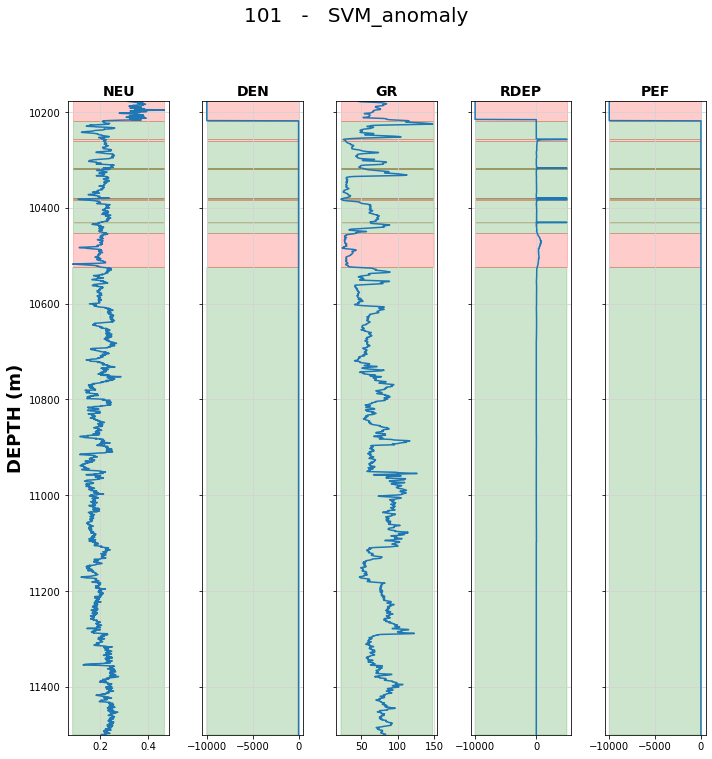

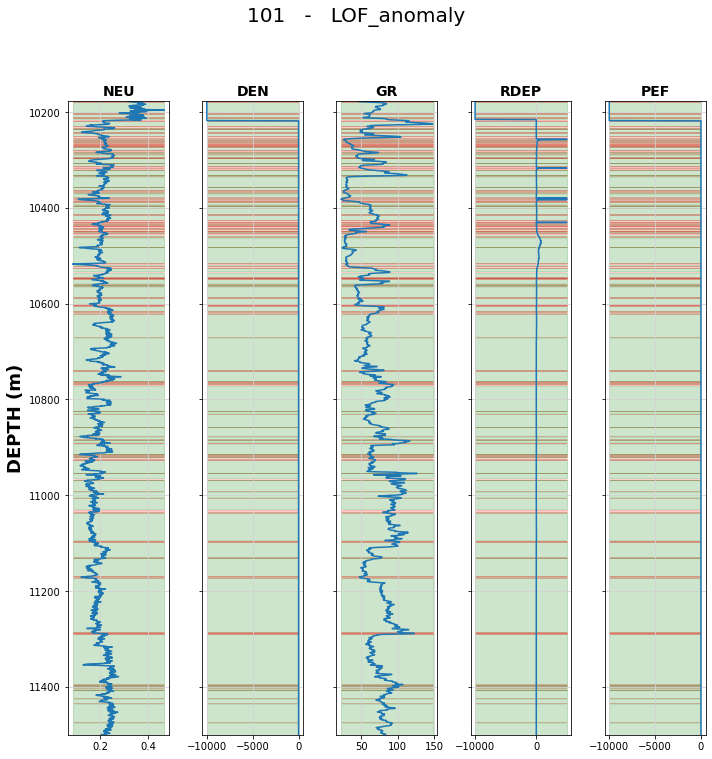

In [33]:
well = 1

# Call the function for each method:
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'IF_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'SVM_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'LOF_anomaly')

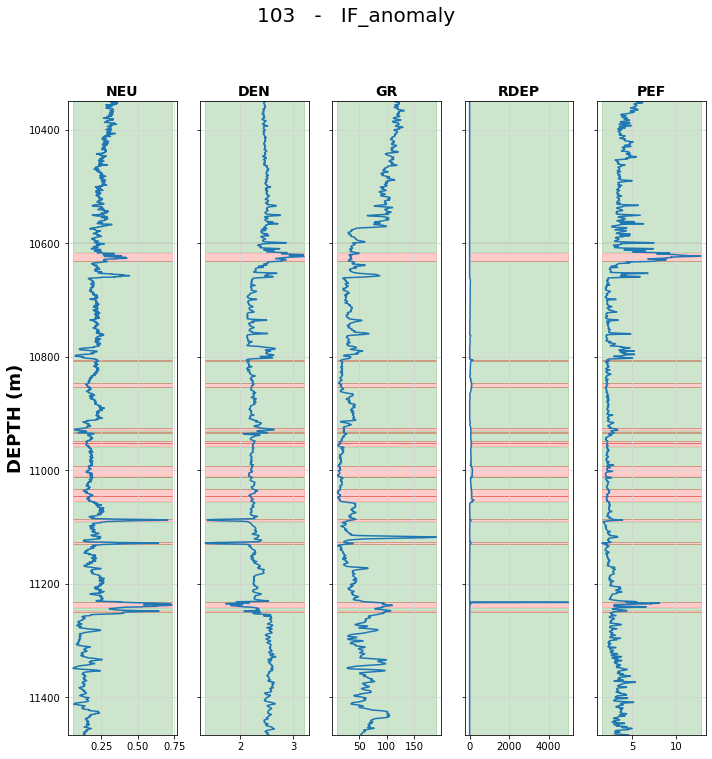

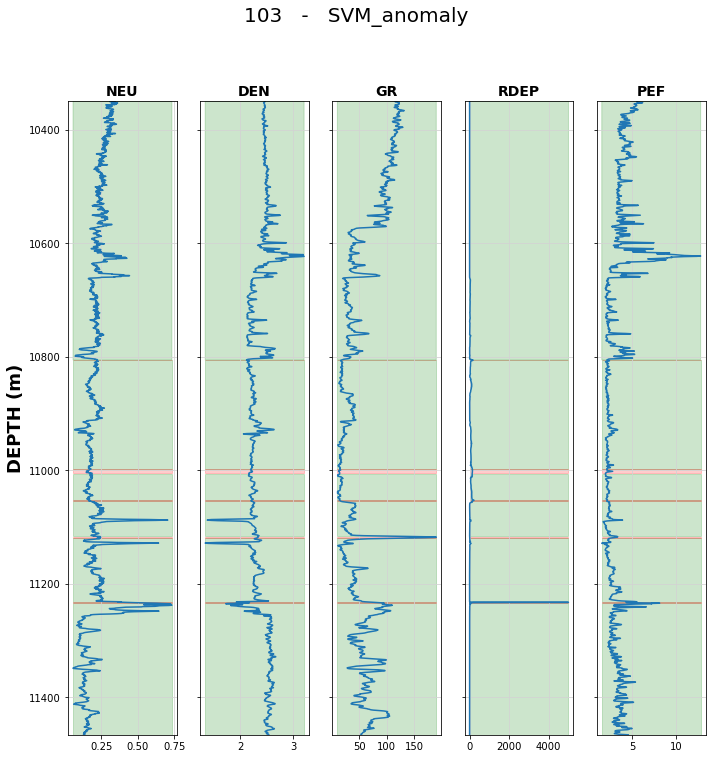

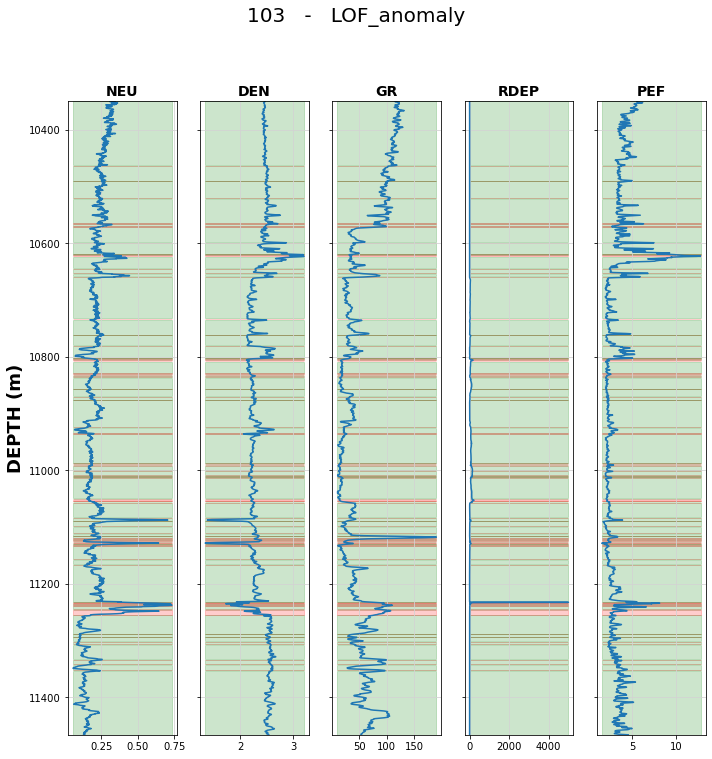

In [34]:
well = 2

# Call the function for each method:
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'IF_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'SVM_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'LOF_anomaly')

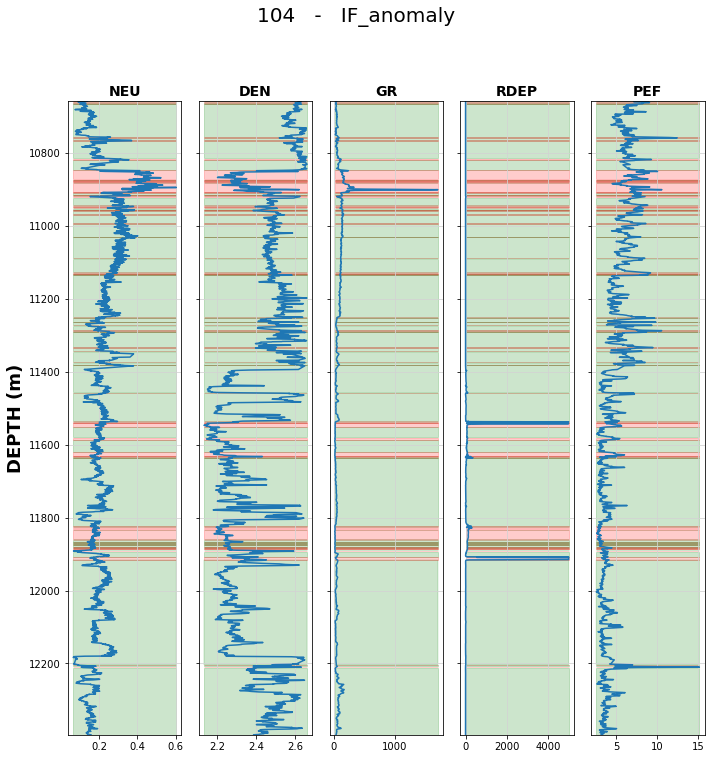

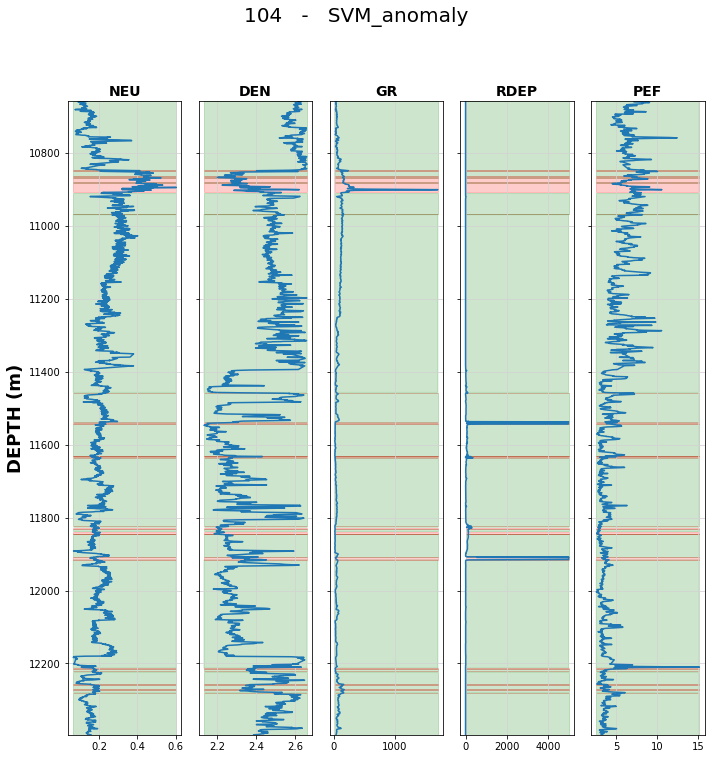

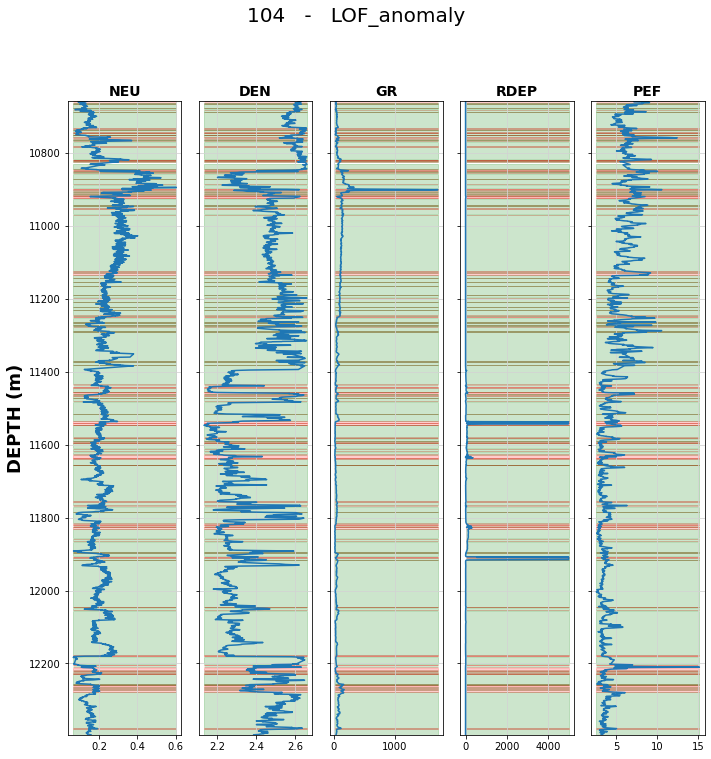

In [35]:
well = 3

# Call the function for each method:
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'IF_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'SVM_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'LOF_anomaly')